In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
crime = pd.read_csv(r"crime-dataset.csv")

In [4]:
crime.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [3]:
crime['STATE/UT'] = crime['STATE/UT'].str.lower()

In [4]:
crime.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

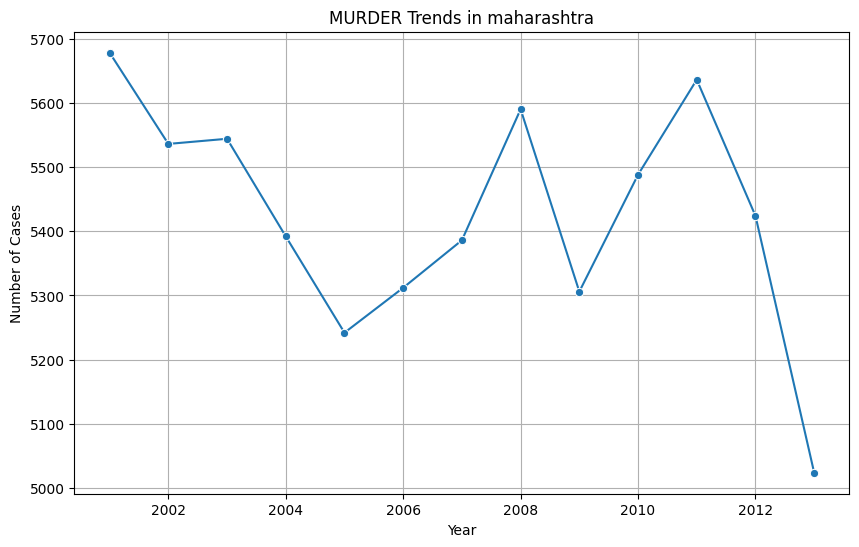

In [10]:
def plot_crime_trends(state, crime_type):

    crime['STATE/UT'] = crime['STATE/UT'].str.lower()
    state=state.lower()
    # Filter data    
    state_data = crime[crime['STATE/UT'] == state]
    
    # Aggregate yearly totals
    trends = state_data.groupby('YEAR')[crime_type].sum()

    # Plot line chart
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=trends, marker='o')
    plt.title(f"{crime_type} Trends in {state}")
    plt.xlabel("Year")
    plt.ylabel("Number of Cases")
    plt.grid()
    plt.show()
    
# Example Usage
plot_crime_trends('Maharashtra', 'MURDER')


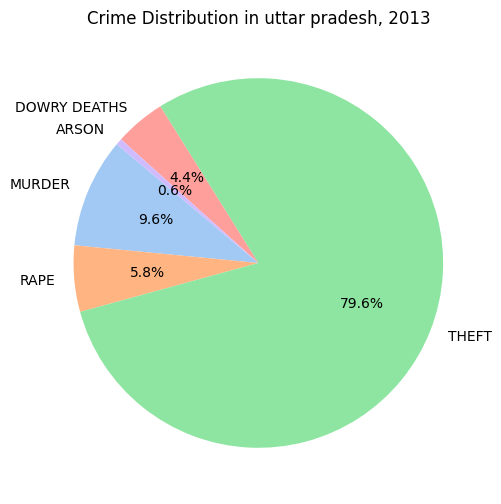

In [9]:
def plot_crime_distribution(state, year):
    state= state.lower()
    crime['STATE/UT'] = crime['STATE/UT'].str.lower()
    
    state_data = crime[(crime['STATE/UT'] == state) & (crime['YEAR'] == year)]
    
    # Select relevant columns
    crime_categories = state_data[['MURDER', 'RAPE', 'THEFT', 'DOWRY DEATHS', 'ARSON']].sum()

    # Plot pie chart
    plt.figure(figsize=(8, 6))
    crime_categories.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    plt.title(f"Crime Distribution in {state}, {year}")
    plt.ylabel("")  # Remove y-label for better display
    plt.show()
    
# Example Usage
plot_crime_distribution('Uttar Pradesh', 2013)


In [7]:
!pip install folium

^C



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import folium
import geopandas as gpd

def plot_crime_map(year, crime_type):
    # Aggregate data by state
    crime_by_state = crime[crime['YEAR'] == year].groupby('STATE/UT')[crime_type].sum().reset_index()


    
    # Load GeoJSON or Shapefile for India's map
    india_geo = gpd.read_file('india_map/map.shp')

    crime['STATE/UT'] = crime['STATE/UT'].str.upper().str.replace('&', 'AND').str.replace(' ', '_')
    india_geo['NAME_1'] = india_geo['NAME_1'].str.upper().str.replace(' ', '_')
    
    # Assign CRS if missing
    if india_geo.crs is None:
        india_geo.set_crs(epsg=4326, inplace=True)
    
    # Merge crime data with GeoDataFrame
    india_map = india_geo.merge(crime_by_state, left_on='NAME_1', right_on='STATE/UT')
    
    # Create Folium map
    m = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
    
    # Add Choropleth layer
    folium.Choropleth(
        geo_data=india_map,
        data=crime_by_state,
        columns=['STATE/UT', crime_type],
        key_on='feature.properties.NAME_1',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name=f"{crime_type} in {year}"
    ).add_to(m)
    
    # Save or display
    m.save("crime_map.html")
    
# Example Usage
plot_crime_map(2013, 'TOTAL IPC CRIMES')


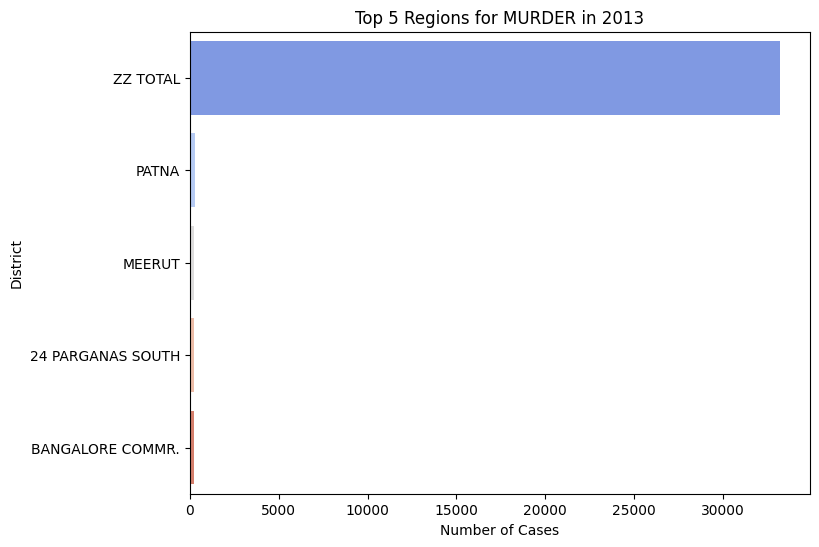

In [11]:
def plot_top_regions(year, crime_type):
    # Aggregate data
    top_regions = crime[crime['YEAR'] == year].groupby('DISTRICT')[crime_type].sum().nlargest(5)
    
    # Plot bar chart
    plt.figure(figsize=(8, 6))
    sns.barplot(x=top_regions.values, y=top_regions.index, palette='coolwarm')
    plt.title(f"Top 5 Regions for {crime_type} in {year}")
    plt.xlabel("Number of Cases")
    plt.ylabel("District")
    plt.show()

# Example Usage
plot_top_regions(2013, 'MURDER')
